[**Demo %s**](#demo-fitting-tempfit)

Here are the 5-year temperature averages again.

In [28]:
year = (1955:5:2000)';
y = [ -0.0480; -0.0180; -0.0360; -0.0120; -0.0040;
    0.1180; 0.2100; 0.3320; 0.3340; 0.4560 ];

```{index} ! MATLAB; \\
```

The standard best-fit line results from using a linear polynomial that meets the least-squares criterion.
```{tip}
:class: dropdown
Backslash solves overdetermined linear systems in a least-squares sense.
```

In [29]:
t = (year - 1955) / 10;    % better matrix conditioning later
V = [ t.^0 t ];            % Vandermonde-ish matrix
size(V)

ans = 1×2 double
    10     2

In [30]:
c = V \ y;
f = @(year) polyval(c(end:-1:1), (year - 1955) / 10);

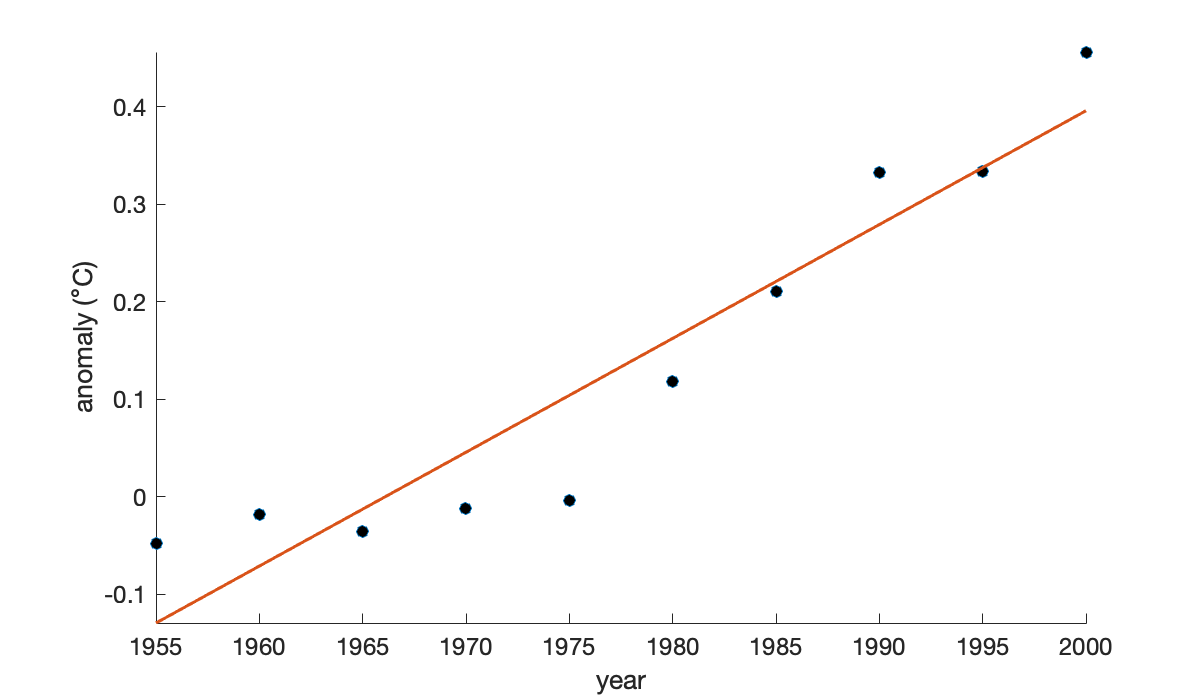

In [31]:
clf
scatter(year, y), axis tight
xlabel('year'), ylabel('anomaly ({\circ}C)')
hold on
fplot(f, [1955, 2000]) 

If we use a global cubic polynomial, the points are fit more closely.

In [32]:
V = [t.^0, t.^1, t.^2, t.^3];    % Vandermonde-ish matrix  
size(V)

ans = 1×2 double
    10     4

Now we solve the new least-squares problem to redefine the fitting polynomial.
```{tip}
:class: dropdown
The definition of `f` above is in terms of `c`. When `c` is changed, then `f` has to be redefined.
```

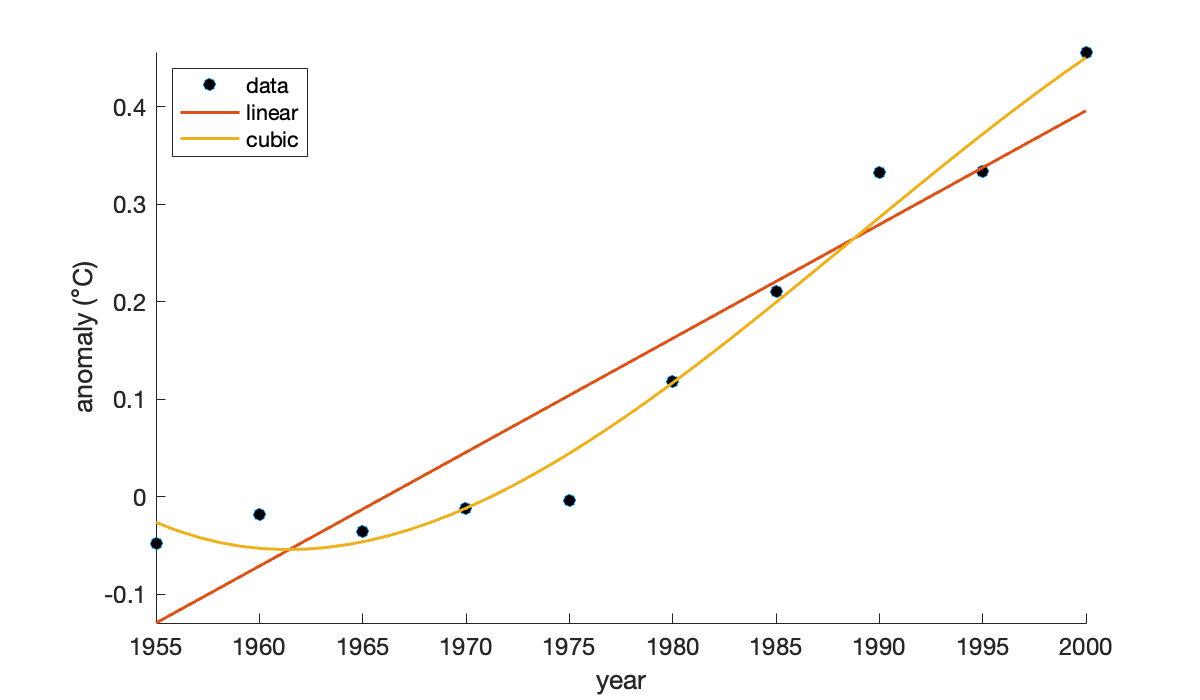

In [33]:
c = V \ y;
f = @(year) polyval(c(end:-1:1), (year - 1955) / 10);
fplot(f, [1955, 2000]) 
legend('data', 'linear', 'cubic', 'Location', 'northwest');

If we were to continue increasing the degree of the polynomial, the residual at the data points would get smaller, but overfitting would increase.